<a id='intro'></a>
## Introduction

### Dataset Description 

> There are 21 columns in the tmdb-movies database. The columns are as follows: id, imdb_id, popularity, budget, revenue, original_title, cast, homepage, director, tagline, keywords, overview, runtime, genres, production_companies, release_date, vote_count, vote_average, release_year, budget_adj, and revenue_adj. For this project we are going to be using the popularity, original_title, runtime, genres, production_companies, budget_adj and revenue_adj columns. 


### Question(s) for Analysis
> Which attributes correlate more closely with higher revenue? 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In the next few cells I will be looking at the database from a few different angles to get an idea of the cleaning I am going to have to do. 

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape

(10866, 21)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Next I am going to clean up my dataset to use only the columns I will need, get rid of or fix any null values, and seperate some of the bar seperated values in the cells. 

In [6]:
#Creating a new dataset with only the data I will need for the project
df = df[['popularity', 'original_title', 'runtime', 'genres', 'budget_adj', 'revenue_adj']]
df.head()

,popularity,original_title,runtime,genres,budget_adj,revenue_adj
0,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,137,Action|Crime|Thriller,1.747999e+08,1.385749e+09


In [7]:
#Changing 0 values in the runtime, budget_adj, and revenue_adj columns to nan values
change_cols = ['runtime', 'budget_adj', 'revenue_adj']
df[change_cols] = df[change_cols].apply(lambda cols: cols.replace(0,np.nan), axis=1)
df.describe()

,popularity,runtime,budget_adj,revenue_adj
count,10866.000000,10835.000000,5.170000e+03,4.850000e+03
mean,0.646441,102.362898,3.688774e+07,1.150774e+08
std,1.000185,30.946957,4.195701e+07,1.988419e+08
min,0.000065,2.000000,9.210911e-01,2.370705e+00
25%,0.207583,90.000000,8.102293e+06,1.046262e+07
50%,0.383856,99.000000,2.272271e+07,4.392749e+07
75%,0.713817,112.000000,5.007483e+07,1.315644e+08
max,32.985763,900.000000,4.250000e+08,2.827124e+09


In [8]:
#Getting rid of some extreme outliers in the popularity column
df_pop = df
df_pop['popularity'].sort_values(ascending=False)
df_pop = df_pop.tail(-2)


What specific variables correlate more closely to higher revenues?

First, here is a brief glance of the variables we will be looking into.

In [9]:
#Function for histograms
def create_hist(dfr, col, binsize, title, xlab, ylab):
    plt.figure(figsize=(12,6))
    counts, edges, bars = plt.hist(dfr[col], bins=binsize)
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.bar_label(bars)

In [10]:
#Function for bar graphs
def create_bar(df, title, xlab, ylab):
    df.plot(kind='bar', figsize=[12,6], legend=False)
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)

In [11]:
#Function for scatterplots
def create_scatter(df, x, y, size, title, xlab, ylab):
    plt.figure(figsize=(12, 6))
    plt.scatter(df[x], df[y], s=size)
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)

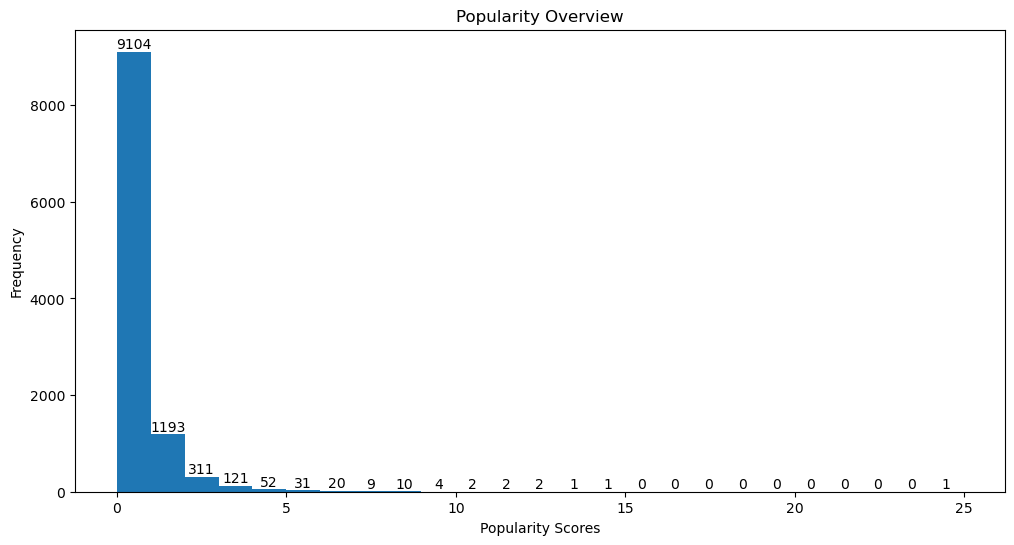

In [12]:
create_hist(df_pop, 'popularity', 25, 'Popularity Overview', 'Popularity Scores', 'Frequency')

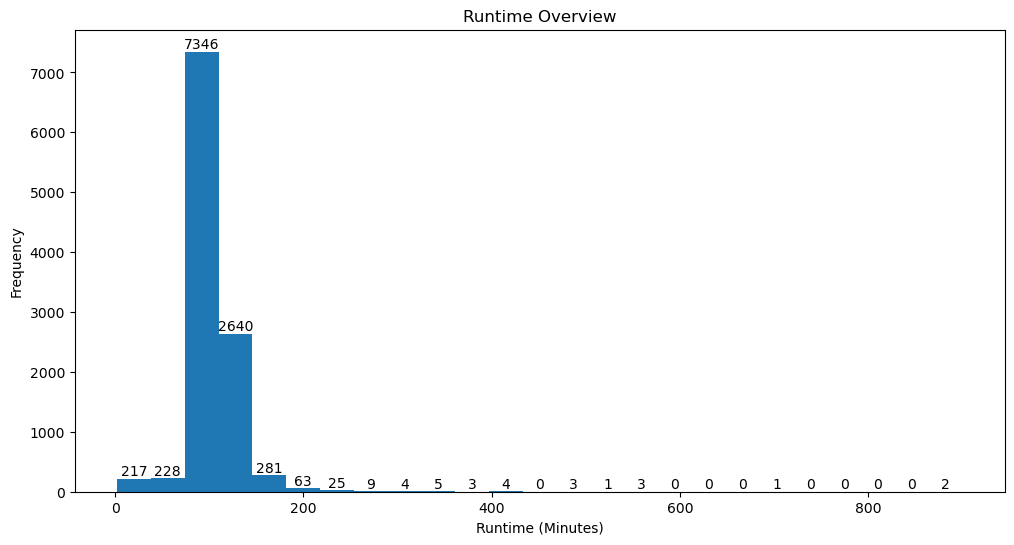

In [13]:
create_hist(df, 'runtime', 25, 'Runtime Overview', 'Runtime (Minutes)', 'Frequency')

In [14]:
# Turning all of the cells in the genres column with multiple values into lists
df.genres = df.genres.str.split('|')
df.head()

,popularity,original_title,runtime,genres,budget_adj,revenue_adj
0,32.985763,Jurassic World,124.0,"[Action, Adventure, Science Fiction, Thriller]",1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,120.0,"[Action, Adventure, Science Fiction, Thriller]",1.379999e+08,3.481613e+08
2,13.112507,Insurgent,119.0,"[Adventure, Science Fiction, Thriller]",1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,136.0,"[Action, Adventure, Science Fiction, Fantasy]",1.839999e+08,1.902723e+09
4,9.335014,Furious 7,137.0,"[Action, Crime, Thriller]",1.747999e+08,1.385749e+09


In [15]:
#Create a series of movies made by genre for visualization
df3 = df.explode('genres')
df3 = df3['genres'].value_counts()
df3


Drama              4761
Comedy             3793
Thriller           2908
Action             2385
Romance            1712
Horror             1637
Adventure          1471
Crime              1355
Family             1231
Science Fiction    1230
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
Name: genres, dtype: int64

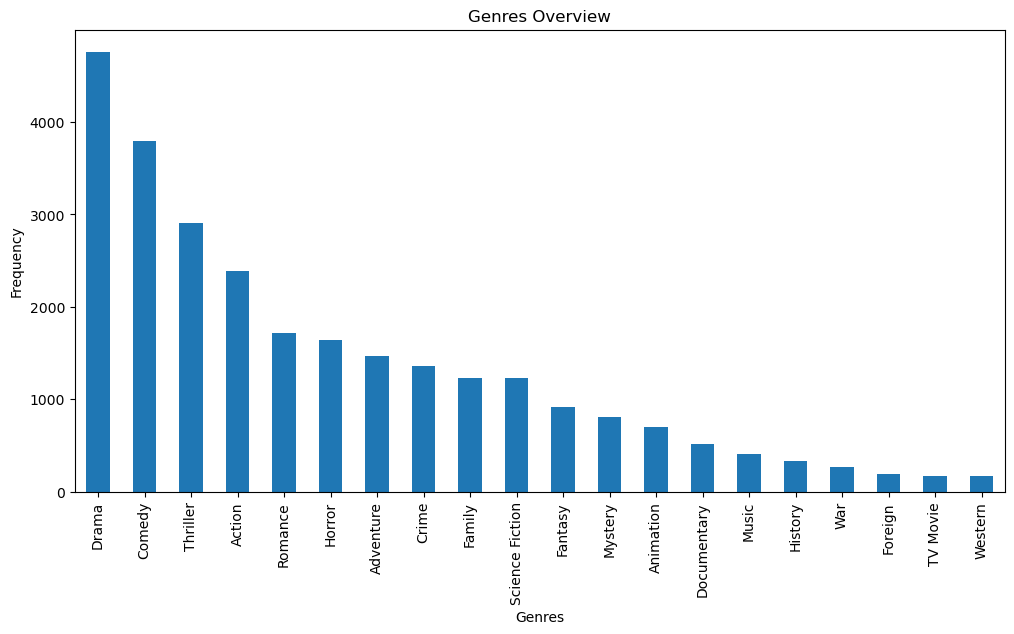

In [16]:
create_bar(df3, 'Genres Overview', 'Genres', 'Frequency')

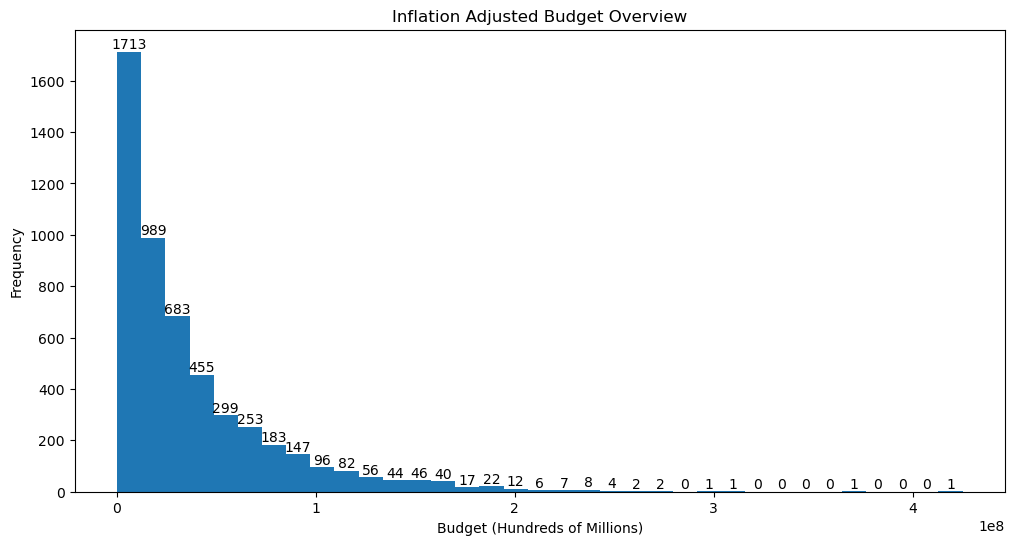

In [17]:
create_hist(df, 'budget_adj', 35, 'Inflation Adjusted Budget Overview', 'Budget (Hundreds of Millions)', 'Frequency')

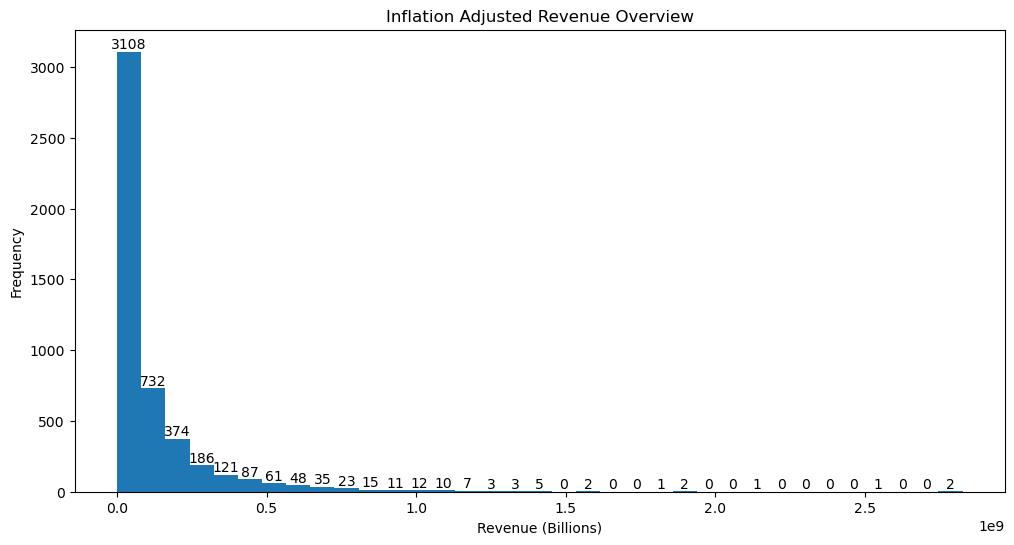

In [18]:
create_hist(df, 'revenue_adj', 35, 'Inflation Adjusted Revenue Overview', 'Revenue (Billions)', 'Frequency')

Now let's compare some of these variables to see if we can find any correlations to revenue.

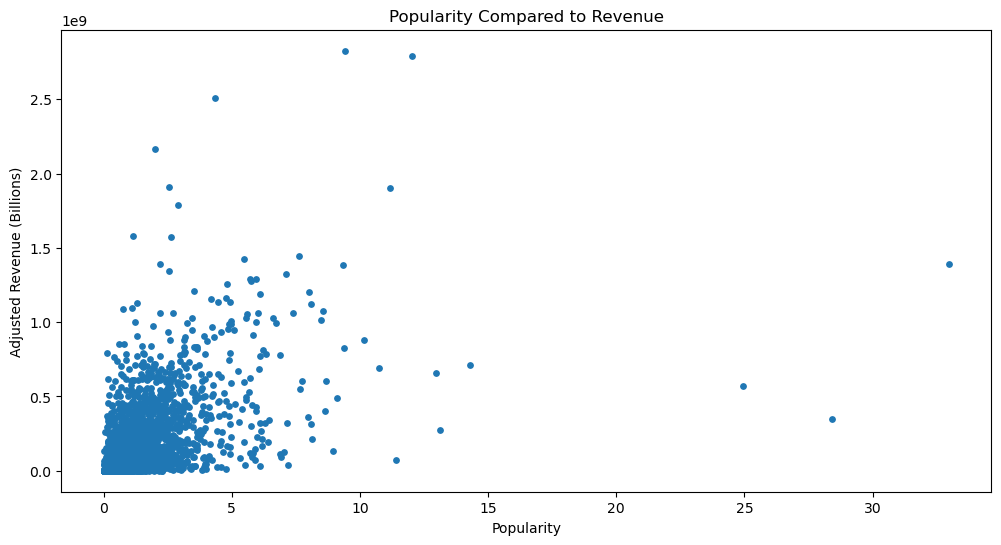

In [19]:
create_scatter(df, 'popularity', 'revenue_adj', 15, 'Popularity Compared to Revenue', 'Popularity', 'Adjusted Revenue (Billions)')

Let's find out if narrowing it down to the top 50 movies in terms of revenue changes things

Here we can see that 6 of the 7 highest grossing movies have a runtime between 110 and 170 minutes. Overall it's still a pretty weak correlation to say that runtime has any real bearing on revenue. 

In [20]:
# Creating a dataset of the top 50 movies by revenue
df_top50 = df.sort_values(by='revenue_adj', ascending=False)
df_top50 = df_top50.head(50)
df_top50.head()

,popularity,original_title,runtime,genres,budget_adj,revenue_adj
1386,9.432768,Avatar,162.0,"[Action, Adventure, Fantasy, Science Fiction]",2.408869e+08,2.827124e+09
1329,12.037933,Star Wars,121.0,"[Adventure, Action, Science Fiction]",3.957559e+07,2.789712e+09
5231,4.355219,Titanic,194.0,"[Drama, Romance, Thriller]",2.716921e+08,2.506406e+09
10594,2.010733,The Exorcist,122.0,"[Drama, Horror, Thriller]",3.928928e+07,2.167325e+09
9806,2.563191,Jaws,124.0,"[Horror, Thriller, Adventure]",2.836275e+07,1.907006e+09


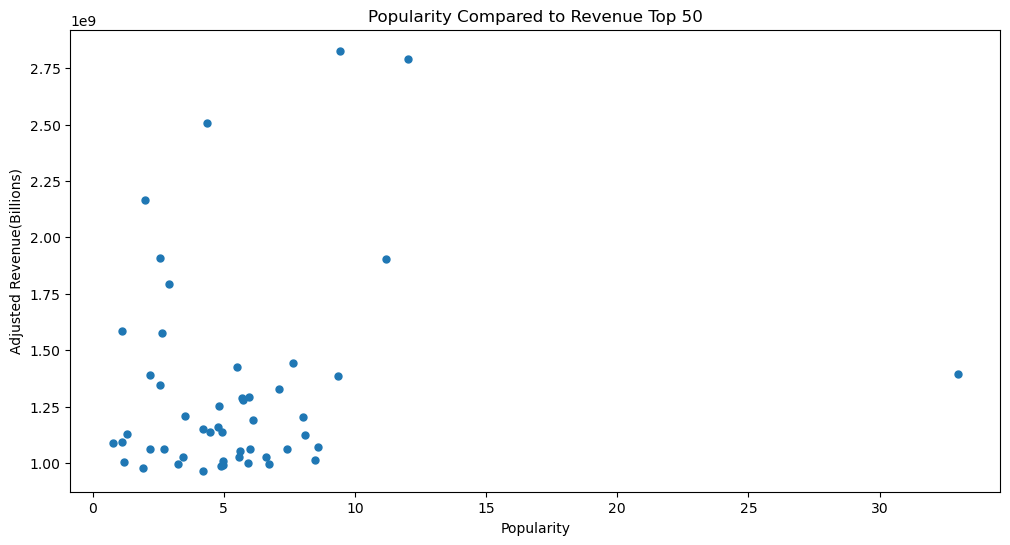

In [21]:
create_scatter(df_top50, 'popularity', 'revenue_adj', 25, 'Popularity Compared to Revenue Top 50', 'Popularity', 'Adjusted Revenue(Billions)')

From this look it's still really hard to say that there is any direct correlation with popularity and revenue. 

Let's see if the runtime of a movie can be linked to revenue.

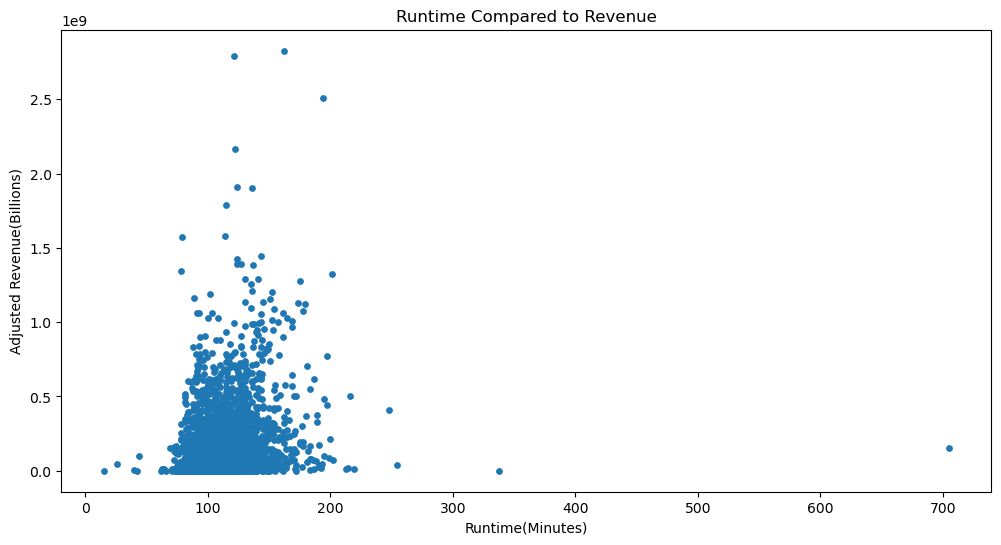

In [22]:
create_scatter(df, 'runtime', 'revenue_adj', 15, 'Runtime Compared to Revenue', 'Runtime(Minutes)', 'Adjusted Revenue(Billions)')

Here we can see a slightly stronger tie between these two variables. Any movie that made over $500,000,000 was between 80 and 200 minutes. Now, the majority of movies are also in that window and did not make that much money. Let's look at the top 50 in terms of revenue to see if we can get a better idea of what's going on.

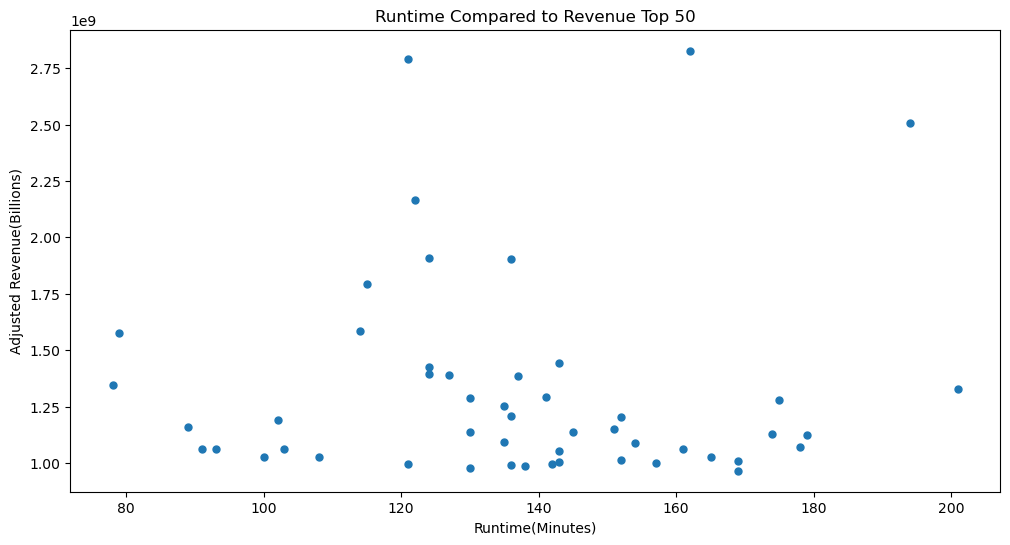

In [23]:
create_scatter(df_top50, 'runtime', 'revenue_adj', 25, 'Runtime Compared to Revenue Top 50', 'Runtime(Minutes)', 'Adjusted Revenue(Billions)')

Let's see if there is a specific genre that looks to make more money than the others.

In [24]:
# Using the explode function to iterate through all rows and add up the total revenue per genre (note that titles 
# can be associated with more than one genre.)
df_genre = df.explode('genres').groupby('genres').sum('revenue_adj')
df_genre

,popularity,runtime,budget_adj,revenue_adj
genres,,,,
Action,2208.834685,250216.0,7.860690e+10,2.187527e+11
Adventure,1697.915054,156181.0,6.463182e+10,2.084043e+11
Animation,595.674975,47659.0,1.768145e+10,5.959403e+10
Comedy,2247.759649,366954.0,6.038575e+10,1.816733e+11
Crime,1009.232253,144858.0,2.918638e+10,7.668667e+10
Documentary,94.344445,53379.0,3.240758e+08,1.174269e+09
Drama,2816.114145,525968.0,7.073282e+10,1.923865e+11
Family,968.388793,110302.0,3.314331e+10,1.080039e+11
Fantasy,909.441171,92275.0,3.428525e+10,1.018905e+11


In [25]:
# Sorting the values from greatest to least
df_genre.sort_values(by='revenue_adj', ascending=False, inplace=True)

In [26]:
# Dropping the columns we don't need in this dataframe
df_genre = df_genre.drop(['popularity', 'runtime', 'budget_adj'], axis=1)
df_genre.head()

,revenue_adj
genres,
Action,2.187527e+11
Adventure,2.084043e+11
Drama,1.923865e+11
Comedy,1.816733e+11
Thriller,1.607177e+11


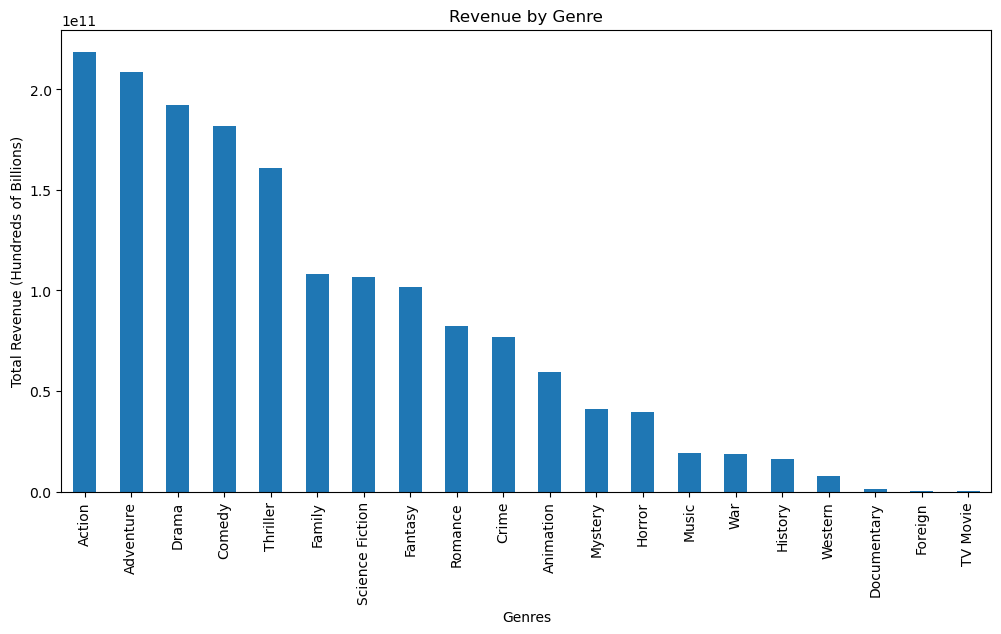

In [27]:
create_bar(df_genre, 'Revenue by Genre', 'Genres', 'Total Revenue (Hundreds of Billions)')

This is the strongest correlation we've seen thus far. Here we can see that in general audiences prefer specific genres of movies. The top two, action and adventure, really tie together. 

Let's see how budget effects revenue.

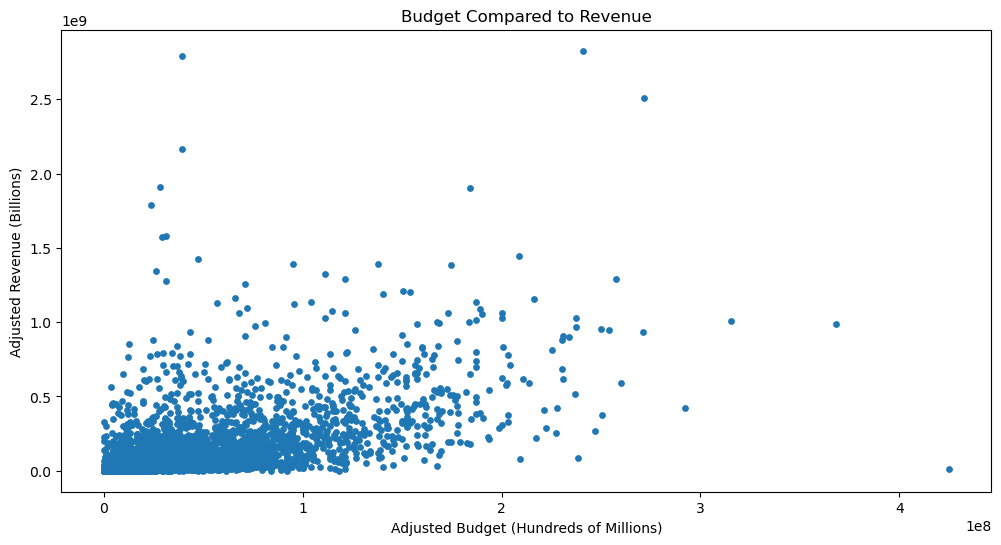

In [28]:
create_scatter(df, 'budget_adj', 'revenue_adj', 15, 'Budget Compared to Revenue', 'Adjusted Budget (Hundreds of Millions)', 'Adjusted Revenue (Billions)')

Let's look at a bar chart comparing the top 10 movies' budgets to their revenues

In [29]:
# Creating a dataset of top 10 revenue movies
df_top10 = df_top50.head(10)

In [30]:
# Dropping unneccesary columns
df_top10 = df_top10.drop(['popularity', 'runtime'], axis=1)
df_top10.head()

,original_title,genres,budget_adj,revenue_adj
1386,Avatar,"[Action, Adventure, Fantasy, Science Fiction]",2.408869e+08,2.827124e+09
1329,Star Wars,"[Adventure, Action, Science Fiction]",3.957559e+07,2.789712e+09
5231,Titanic,"[Drama, Romance, Thriller]",2.716921e+08,2.506406e+09
10594,The Exorcist,"[Drama, Horror, Thriller]",3.928928e+07,2.167325e+09
9806,Jaws,"[Horror, Thriller, Adventure]",2.836275e+07,1.907006e+09


In [31]:
#Insert line breaks in place of spaces in movie titles
df_top10['original_title'] = df_top10['original_title'].str.replace(' ', '\n')

Text(0, 0.5, 'Inflation Adjusted Budget (Hundreds of Millions)')

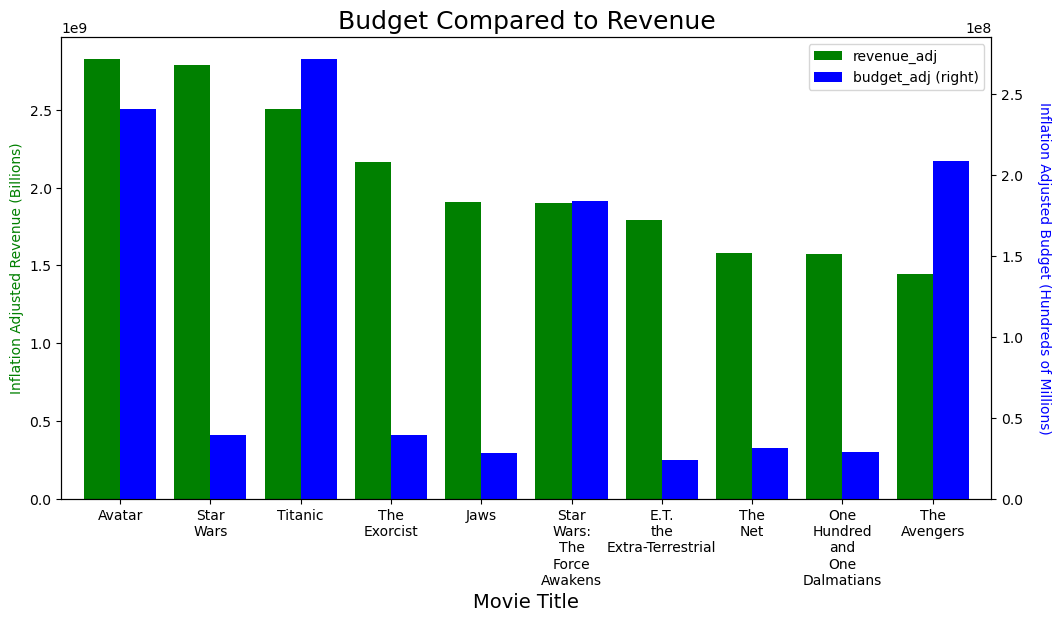

In [33]:
#Create a bar chart to compare budget to revenue
ax = df_top10[['original_title', 'revenue_adj', 'budget_adj']].set_index('original_title').plot(kind='bar', color=['g','b'], rot=0, figsize=(12,6), secondary_y='budget_adj', width=0.8)
ax.set_title('Budget Compared to Revenue', fontsize=18)
ax.set_xlabel('Movie Title', fontsize=14)
ax.set_ylabel('Inflation Adjusted Revenue (Billions)', color='g')
ax.right_ax.set_ylabel('Inflation Adjusted Budget (Hundreds of Millions)', color='b', rotation=270, labelpad=20)


Here it's hard to say that a higher budget is directly associated with a higher revenue. 

<a id='conclusions'></a>
## Conclusions

> It looks like the only factor we looked at that has any real correlation to revenue is the genre category. Here we can see that the more popular genres of action, adventure, and thriller generate the highest amount of revenue. When looking at runtime, popularity, or even budget, there is no clear correlation to the generation of revenue. 
### Limitation
> One limitation we faced was that there were multiple movies with a 0 amount for either the budget and/or the revenue. Assuming that this is an error, we had to drop those rows. This means that some of the correlations and charts would look slightly different if we had all of the correct data. 

In [34]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1